# Name: Kriti Shukla
# USC ID: 1242060484
# Github username: kas140472

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

### (a) Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re,random
from sklearn import svm
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,hamming_loss
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [86]:
path='../data/Frogs_MFCCs.csv'
df = pd.read_csv(path,sep=',',skiprows=0)
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [87]:
train_df,test_df = train_test_split(df, train_size=0.7,random_state=42)

train_df = train_df.iloc[:,:-1]
train_df = train_df.reset_index(drop=True)

train_x = train_df.iloc[:,:-3]
train_y = train_df.iloc[:,-3:]
train_y_Family = train_df.iloc[:,-3]
train_y_Genus = train_df.iloc[:,-2]
train_y_Species = train_df.iloc[:,-1]

test_df = test_df.iloc[:,:-1]
test_df = test_df.reset_index(drop=True)

test_x = test_df.iloc[:,:-3]
test_y = test_df.iloc[:, -3:]
test_y_Family = test_df.iloc[:,-3]
test_y_Genus = test_df.iloc[:,-2]
test_y_Species = test_df.iloc[:,-1]

### (b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach.

### i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

Exact Match Metric: This metric indicates the percentage of samples that have all their labels classified correctly.

Hamming Loss Metric: This metric considers the fraction of labels that are incorrectly predicted.

In [88]:
def exact_match_score(y_true, y_pred):
    total_matches = sum(all(true == pred for true, pred in zip(y_true_row, y_pred_row))
                      for y_true_row, y_pred_row in zip(y_true.values, y_pred.values))
    
    match_score = total_matches / len(y_true)
    
    print(f"Exact match score: {match_score:.4f}")
    
    return round(match_score, 4)

def hamming_loss(y_true, y_pred):
    total_errors = sum(np.count_nonzero(y_true_row != y_pred_row) for y_true_row, y_pred_row in zip(y_true.values, y_pred.values))
    total_elements = y_true.size
    
    hamming_loss_value = total_errors / total_elements
    
    print(f"Hamming Loss: {hamming_loss_value:.4f}")
    print(f"Hamming Score: {1 - hamming_loss_value:.4f}")
    
    return round(hamming_loss_value, 4)

def evaluate_classification(train_y, test_y, y_pred_train, y_pred_test):

    print(f"Test data:")
    exactmatch_test = exact_match_score(test_y, y_pred_test)
    hamloss_test = hamming_loss(test_y, y_pred_test)

    return {
        "exact_match_test": exactmatch_test,
        "hamming_loss_test": hamloss_test
    }

### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [89]:
def initialize_prediction_data(columns):
    return pd.DataFrame(columns=columns)

def print_cv_results(grid_search, col):
    print("CV Score (Mean), CV Score (Std) for Parameters")
    
    for params, mean_score, std_score in zip(grid_search.cv_results_['params'],
                                             grid_search.cv_results_['mean_test_score'],
                                             grid_search.cv_results_['std_test_score']):
        print(f"Mean Score: {mean_score:.4f} with Std.: {std_score:.4f} for parameters: {params}")

def SVM_Classifier(X_train, X_test, y_train_now, col, classifier):
    
    if(classifier == 'svm' or classifier == 'std'):
        parameters = {"C": np.logspace(-5, 4, 10), "gamma": np.logspace(-5, 4, 10)}
        svc = SVC(kernel="rbf", decision_function_shape='ovr')
    else:
        parameters = {"C": np.logspace(-5, 4, 10)}
        svc = LinearSVC(penalty='l1',dual = False)
        
    grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    grid_search.fit(X_train, y_train_now)
    
    print_cv_results(grid_search, col)

    best_estimator = grid_search.best_estimator_
    
    y_train_predict = best_estimator.predict(X_train)
    
    y_test_predict = best_estimator.predict(X_test)
    
    
    if(classifier == 'svm'):
        y_pred_train_svm[col] = y_train_predict
        y_pred_test_svm[col] = y_test_predict
    elif(classifier == 'std'):
        y_pred_train_std[col] = y_train_predict
        y_pred_test_std[col] = y_test_predict
    else:
        y_pred_train_l1[col] = y_train_predict
        y_pred_test_l1[col] = y_test_predict
   
    print(f"Best parameters: {grid_search.best_params_}")

In [90]:
y_pred_test_svm = initialize_prediction_data(test_y.columns)
y_pred_train_svm = initialize_prediction_data(train_y.columns)

In [91]:
SVM_Classifier(train_x, test_x, train_y_Family , 'Family', 'svm')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 1e-05}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.0001}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.001}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.01}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.1}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 1.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 10.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 100.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 1000.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 10000.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 0.0001, 'gamma': 1e-05}
Mean Score: 0.6102 with Std.: 0.0008 for parameters:

Best parameters: {'C': 100.0, 'gamma': 1.0}


In [92]:
SVM_Classifier(train_x, test_x, train_y_Genus , 'Genus', 'svm')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1e-05}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.0001}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.001}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.01}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.1}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 100.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1000.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10000.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 0.0001, 'gamma': 1e-05}
Mean Score: 0.5757 with Std.: 0.0006 for parameters:

Best parameters: {'C': 100.0, 'gamma': 1.0}


In [93]:
SVM_Classifier(train_x, test_x, train_y_Species , 'Species', 'svm')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1e-05}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.0001}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.001}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.01}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.1}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 100.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1000.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10000.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 0.0001, 'gamma': 1e-05}
Mean Score: 0.4859 with Std.: 0.0006 for parameters:

Best parameters: {'C': 10.0, 'gamma': 1.0}


In [94]:
evaluation_results = evaluate_classification(train_y, test_y, y_pred_train_svm, y_pred_test_svm)

svm_test_exactmatch = evaluation_results["exact_match_test"]
svm_test_hamloss = evaluation_results["hamming_loss_test"]

Test data:
Exact match score: 0.9861
Hamming Loss: 0.0083
Hamming Score: 0.9917


## with standardized data

In [95]:
# standardizing data

stdScaler=StandardScaler()
train_x_std = stdScaler.fit_transform(train_x)
test_x_std = stdScaler.transform(test_x)

In [96]:
y_pred_test_std = initialize_prediction_data(test_y.columns)
y_pred_train_std = initialize_prediction_data(train_y.columns)

In [97]:
SVM_Classifier(train_x_std, test_x_std, train_y_Family , 'Family', 'std')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 1e-05}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.0001}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.001}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.01}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 0.1}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 1.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 10.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 100.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 1000.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 1e-05, 'gamma': 10000.0}
Mean Score: 0.6102 with Std.: 0.0008 for parameters: {'C': 0.0001, 'gamma': 1e-05}
Mean Score: 0.6102 with Std.: 0.0008 for parameters:

Best parameters: {'C': 1000.0, 'gamma': 0.01}


In [98]:
SVM_Classifier(train_x_std, test_x_std, train_y_Genus , 'Genus', 'std')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1e-05}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.0001}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.001}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.01}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.1}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 100.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1000.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10000.0}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 0.0001, 'gamma': 1e-05}
Mean Score: 0.5757 with Std.: 0.0006 for parameters:

Best parameters: {'C': 10.0, 'gamma': 0.01}


In [99]:
SVM_Classifier(train_x_std, test_x_std, train_y_Species , 'Species', 'std')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1e-05}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.0001}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.001}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.01}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 0.1}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 100.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 1000.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 1e-05, 'gamma': 10000.0}
Mean Score: 0.4859 with Std.: 0.0006 for parameters: {'C': 0.0001, 'gamma': 1e-05}
Mean Score: 0.4859 with Std.: 0.0006 for parameters:

Best parameters: {'C': 100.0, 'gamma': 0.01}


In [100]:
evaluation_results = evaluate_classification(train_y, test_y, y_pred_train_std, y_pred_test_std)

std_test_exactmatch = evaluation_results["exact_match_test"]
std_test_hamloss = evaluation_results["hamming_loss_test"]

Test data:
Exact match score: 0.9792
Hamming Loss: 0.0113
Hamming Score: 0.9887


### iii. Repeat 1(b)ii with L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [101]:
y_pred_test_l1 = initialize_prediction_data(test_y.columns)
y_pred_train_l1 = initialize_prediction_data(train_y.columns)

In [102]:
SVM_Classifier(train_x_std, test_x_std, train_y_Family , 'Family', 'l1')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.0081 with Std.: 0.0006 for parameters: {'C': 1e-05}
Mean Score: 0.0081 with Std.: 0.0006 for parameters: {'C': 0.0001}
Mean Score: 0.8523 with Std.: 0.0103 for parameters: {'C': 0.001}
Mean Score: 0.9305 with Std.: 0.0095 for parameters: {'C': 0.01}
Mean Score: 0.9380 with Std.: 0.0078 for parameters: {'C': 0.1}
Mean Score: 0.9408 with Std.: 0.0078 for parameters: {'C': 1.0}
Mean Score: 0.9412 with Std.: 0.0076 for parameters: {'C': 10.0}
Mean Score: 0.9410 with Std.: 0.0075 for parameters: {'C': 100.0}
Mean Score: 0.9410 with Std.: 0.0075 for parameters: {'C': 1000.0}
Mean Score: 0.9410 with Std.: 0.0075 for parameters: {'C': 10000.0}
Best parameters: {'C': 10.0}


In [103]:
SVM_Classifier(train_x_std, test_x_std, train_y_Genus , 'Genus', 'l1')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 1e-05}
Mean Score: 0.5757 with Std.: 0.0006 for parameters: {'C': 0.0001}
Mean Score: 0.8235 with Std.: 0.0056 for parameters: {'C': 0.001}
Mean Score: 0.9134 with Std.: 0.0066 for parameters: {'C': 0.01}
Mean Score: 0.9424 with Std.: 0.0048 for parameters: {'C': 0.1}
Mean Score: 0.9500 with Std.: 0.0056 for parameters: {'C': 1.0}
Mean Score: 0.9516 with Std.: 0.0057 for parameters: {'C': 10.0}
Mean Score: 0.9516 with Std.: 0.0061 for parameters: {'C': 100.0}
Mean Score: 0.9517 with Std.: 0.0063 for parameters: {'C': 1000.0}
Mean Score: 0.9517 with Std.: 0.0063 for parameters: {'C': 10000.0}
Best parameters: {'C': 1000.0}


In [104]:
SVM_Classifier(train_x_std, test_x_std, train_y_Species , 'Species', 'l1')

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.0898 with Std.: 0.0008 for parameters: {'C': 1e-05}
Mean Score: 0.0898 with Std.: 0.0008 for parameters: {'C': 0.0001}
Mean Score: 0.7869 with Std.: 0.0098 for parameters: {'C': 0.001}
Mean Score: 0.9160 with Std.: 0.0119 for parameters: {'C': 0.01}
Mean Score: 0.9500 with Std.: 0.0114 for parameters: {'C': 0.1}
Mean Score: 0.9603 with Std.: 0.0098 for parameters: {'C': 1.0}
Mean Score: 0.9607 with Std.: 0.0087 for parameters: {'C': 10.0}
Mean Score: 0.9607 with Std.: 0.0087 for parameters: {'C': 100.0}
Mean Score: 0.9607 with Std.: 0.0087 for parameters: {'C': 1000.0}
Mean Score: 0.9607 with Std.: 0.0087 for parameters: {'C': 10000.0}
Best parameters: {'C': 10.0}


In [105]:
evaluation_results = evaluate_classification(train_y, test_y, y_pred_train_l1, y_pred_test_l1)

l1_test_exactmatch = evaluation_results["exact_match_test"]
l1_test_hamloss = evaluation_results["hamming_loss_test"]

Test data:
Exact match score: 0.9125
Hamming Loss: 0.0570
Hamming Score: 0.9430


### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. 

In [106]:
def fit_smote_and_grid_search(X_train_std, X_test_std, y_train_now, y_test_now, col, parameters):
    smote = SMOTE(random_state=42)
    X_train_smote, y_train_smote = smote.fit_resample(X_train_std, y_train_now)
    X_test_smote, y_test_smote = smote.fit_resample(X_test_std, y_test_now)
    
    svc = LinearSVC(penalty='l1', dual=False)
    grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=StratifiedKFold(10, random_state=42, shuffle=True), n_jobs=-1)
    grid_search.fit(X_train_smote, y_train_smote)
    
    print_cv_results(grid_search, col)

    classifiers[col] = grid_search.best_estimator_
    
    print(f"Best parameters: {grid_search.best_params_}")
    
    y_pred_train_smote[col] = classifiers[col].predict(X_train_std) 
    y_pred_test_smote[col] = classifiers[col].predict(X_test_std)

In [107]:
parameters = {"C": np.logspace(1, 5, 5)}

y_pred_test_smote = initialize_prediction_data(test_y.columns)
y_pred_train_smote = initialize_prediction_data(train_y.columns)

classifiers = {}

fit_smote_and_grid_search(train_x_std, test_x_std, train_y_Family, test_y_Family, 'Family', parameters)

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.9516 with Std.: 0.0080 for parameters: {'C': 10.0}
Mean Score: 0.9515 with Std.: 0.0079 for parameters: {'C': 100.0}
Mean Score: 0.9516 with Std.: 0.0080 for parameters: {'C': 1000.0}
Mean Score: 0.9516 with Std.: 0.0080 for parameters: {'C': 10000.0}
Mean Score: 0.9515 with Std.: 0.0079 for parameters: {'C': 100000.0}
Best parameters: {'C': 10.0}


In [108]:
fit_smote_and_grid_search(train_x_std, test_x_std, train_y_Genus, test_y_Genus, 'Genus', parameters)

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.9606 with Std.: 0.0042 for parameters: {'C': 10.0}
Mean Score: 0.9606 with Std.: 0.0042 for parameters: {'C': 100.0}
Mean Score: 0.9606 with Std.: 0.0042 for parameters: {'C': 1000.0}
Mean Score: 0.9606 with Std.: 0.0042 for parameters: {'C': 10000.0}
Mean Score: 0.9606 with Std.: 0.0042 for parameters: {'C': 100000.0}
Best parameters: {'C': 1000.0}


In [109]:
fit_smote_and_grid_search(train_x_std, test_x_std, train_y_Species, test_y_Species, 'Species', parameters)

CV Score (Mean), CV Score (Std) for Parameters
Mean Score: 0.9631 with Std.: 0.0023 for parameters: {'C': 10.0}
Mean Score: 0.9632 with Std.: 0.0023 for parameters: {'C': 100.0}
Mean Score: 0.9632 with Std.: 0.0023 for parameters: {'C': 1000.0}
Mean Score: 0.9632 with Std.: 0.0023 for parameters: {'C': 10000.0}
Mean Score: 0.9632 with Std.: 0.0023 for parameters: {'C': 100000.0}
Best parameters: {'C': 100.0}


In [110]:
evaluation_results = evaluate_classification(train_y, test_y, y_pred_train_smote, y_pred_test_smote)

smote_test_exactmatch = evaluation_results["exact_match_test"]
smote_test_hamloss = evaluation_results["hamming_loss_test"]

Test data:
Exact match score: 0.8532
Hamming Loss: 0.0769
Hamming Score: 0.9231


### Report your conclusions about the classifiers you trained.

In [111]:
conclusion={}
conclusion['SVM: Gaussian Kernels with Raw Data']={'Exact Match Score':svm_test_exactmatch,
                                                             'Hamming Loss':svm_test_hamloss}

conclusion['SVM: Standardized Data']={'Exact Match Score':std_test_exactmatch,
                                                             'Hamming Loss':std_test_hamloss}

conclusion['SVM: L1-Penalized Standarized Data']={'Exact Match Score':l1_test_exactmatch,
                                                             'Hamming Loss':l1_test_hamloss}

conclusion['SVM: SMOTE L1-Penalized Standarized Data']={'Exact Match Score':smote_test_exactmatch,
                                                             'Hamming Loss':smote_test_hamloss}
conclusion_df=pd.DataFrame(conclusion)
conclusion_df

,SVM: Gaussian Kernels with Raw Data,SVM: Standardized Data,SVM: L1-Penalized Standarized Data,SVM: SMOTE L1-Penalized Standarized Data
Exact Match Score,0.9861,0.9792,0.9125,0.8532
Hamming Loss,0.0083,0.0113,0.0570,0.0769


#### Conclusions:

- Exact Match Score is the highest for Gaussian Kernel SVM (with raw data) and lowest for L1-penalized SVM using SMOTE.

- Hamming Loss is lowest for Gaussian Kernel SVM (with raw data) and highest for L1-penalized SVM using SMOTE.

- After balancing classes using SMOTE, compared to unbalanced L1-penalized, the Exact Match Score is lower and Hamming Loss is higher.

- After looking at all the results, the best performing model seems to be the Gaussian Kernel SVM with raw data.

### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### (a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.
### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.


In [112]:
def calculate_silhouette_score(k, X):
    rand_value = random.randint(0, 900)
    k_means = KMeans(n_clusters=k, random_state=rand_value)
    clusters = k_means.fit_predict(X)
    sil_score = silhouette_score(X, clusters)
    return sil_score

def find_best_k(k_start, k_end, X):
    max_score = -1
    best_k = k_start
    
    for k in range(k_start, k_end + 1):
        sil_score = calculate_silhouette_score(k, X)
        if sil_score > max_score:
            best_k = k
            max_score = sil_score
            
    print('Best k: ', best_k)
    return best_k

def calculate_cluster_majority_labels(optimalK, Act_Y, cluster_label):
    majority_dict = {}
    
    for i in range(optimalK):
        majority_dict[i] = []
        for col in Act_Y.columns:
            majority_dict[i].append(get_majority_label_for_cluster(i, col, Act_Y, cluster_label))
            
    return majority_dict

def get_majority_label_for_cluster(cluster_num, col, Act_Y, cluster_label):
    cluster_i_index = np.where(cluster_label == cluster_num)[0]
    cluster_i_label_values_counts = Act_Y.loc[cluster_i_index, col].value_counts()
    cluster_i_label_max = pd.Series(cluster_i_label_values_counts[
        cluster_i_label_values_counts == max(cluster_i_label_values_counts)
    ]).index[0]
    return cluster_i_label_max

def evaluate_cluster_labels(Act_Y, cluster_label, cluster_majority):
    total_labels, correct_class, temp = 0, 0, 0
    
    for i in range(max(cluster_majority) + 1):
        cluster_i_index = np.where(cluster_label == i)[0]
        
        for row in Act_Y.loc[cluster_i_index].values:
            total, matching = calculate_matching_labels(row, cluster_majority[i])
            temp += (total - matching)
            correct_class += matching
            total_labels += total
    
    hamming_loss = temp / (Act_Y.shape[0] * Act_Y.shape[1])
    hamming_score = correct_class / (Act_Y.shape[0] * Act_Y.shape[1])
    hamming_distance = temp / Act_Y.shape[0]
    
    return {'Hamming_Loss': hamming_loss, 'Hamming_Score': hamming_score, 'Hamming_Distance': hamming_distance}

def calculate_matching_labels(row, majority_labels):
    total = np.size(row == majority_labels)
    matching = np.count_nonzero(row == majority_labels)
    return total, matching

def run_single_iteration(X, Act_Y, k_start, k_end):
    k = find_best_k(k_start, k_end, X)
    clusterer = KMeans(n_clusters=k)
    cluster_label = clusterer.fit_predict(X)
    cluster_majority = calculate_cluster_majority_labels(k, Act_Y, cluster_label)
    
    print('\n Cluster Majority: ')

    cluster_major=pd.DataFrame(cluster_majority,index=['Family','Genus','Species'])
    cluster_major.columns = [f'Cluster {i}' for i in range(len(cluster_major.columns))]
    
    display(cluster_major)
    
    return evaluate_cluster_labels(Act_Y, cluster_label, cluster_majority)

def monte_carlo_simulation(N, k_start, k_end, X, Act_Y):
    score_list = {'Hamming_Loss': [], 'Hamming_Score': [], 'Hamming_Distance': []}
    
    for i in range(N):
        print('\n\nIteration ', i + 1)
        iteration_scores = run_single_iteration(X, Act_Y, k_start, k_end)
        
        print('\nEvaluations:')
        print(pd.Series(iteration_scores))
        
        for metric, value in iteration_scores.items():
            score_list[metric].append(value)
            
    return score_list

In [113]:
dfx = df.iloc[:,:-4]
dfy = df.iloc[:,-4:-1]

scores = monte_carlo_simulation(50,2,50,dfx,dfy)



Iteration  1
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Adenomera,Adenomera,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,AdenomeraAndre,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.233356
Hamming_Score       0.766644
Hamming_Distance    0.700069
dtype: float64


Iteration  2
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Adenomera,Hypsiboas,Ameerega
Species,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64


Iteration  3
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Leptodactylidae,Leptodactylidae,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Adenomera,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,AdenomeraHylaedactylus,AdenomeraAndre,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.199629
Hamming_Score       0.800371
Hamming_Distance    0.598888
dtype: float64


Iteration  4
Best k:  3

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2
Family,Leptodactylidae,Hylidae,Hylidae
Genus,Adenomera,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.296780
Hamming_Score       0.703220
Hamming_Distance    0.890341
dtype: float64


Iteration  5
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Adenomera,Ameerega,Hypsiboas
Species,AdenomeraAndre,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.185916
Hamming_Score       0.814084
Hamming_Distance    0.557748
dtype: float64


Iteration  6
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Ameerega,Adenomera,Adenomera,Hypsiboas
Species,Ameeregatrivittata,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64


Iteration  7
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Adenomera,Adenomera,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,AdenomeraHylaedactylus,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.285152
Hamming_Score       0.714848
Hamming_Distance    0.855455
dtype: float64


Iteration  8
Best k:  5

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Family,Leptodactylidae,Hylidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.234839
Hamming_Score       0.765161
Hamming_Distance    0.704517
dtype: float64


Iteration  9
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Hylidae,Leptodactylidae,Leptodactylidae
Genus,Hypsiboas,Hypsiboas,Adenomera,Adenomera
Species,HypsiboasCordobae,HypsiboasCinerascens,AdenomeraHylaedactylus,AdenomeraAndre



Evaluations:
Hamming_Loss        0.233727
Hamming_Score       0.766273
Hamming_Distance    0.701181
dtype: float64


Iteration  10
Best k:  3

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2
Family,Hylidae,Leptodactylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.238499
Hamming_Score       0.761501
Hamming_Distance    0.715497
dtype: float64


Iteration  11
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Dendrobatidae,Hylidae,Leptodactylidae,Hylidae,Hylidae,Leptodactylidae
Genus,Ameerega,Hypsiboas,Adenomera,Leptodactylus,Hypsiboas,Adenomera
Species,Ameeregatrivittata,HypsiboasCordobae,AdenomeraHylaedactylus,LeptodactylusFuscus,HypsiboasCinerascens,AdenomeraHylaedactylus



Evaluations:
Hamming_Loss        0.212601
Hamming_Score       0.787399
Hamming_Distance    0.637804
dtype: float64


Iteration  12
Best k:  5

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Family,Leptodactylidae,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,AdenomeraAndre,Ameeregatrivittata,HypsiboasCordobae,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.199398
Hamming_Score       0.800602
Hamming_Distance    0.598193
dtype: float64


Iteration  13
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.297892
Hamming_Score       0.702108
Hamming_Distance    0.893676
dtype: float64


Iteration  14
Best k:  3

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2
Family,Hylidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Adenomera,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.296780
Hamming_Score       0.703220
Hamming_Distance    0.890341
dtype: float64


Iteration  15
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.297985
Hamming_Score       0.702015
Hamming_Distance    0.893954
dtype: float64


Iteration  16
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Leptodactylidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Adenomera
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,AdenomeraAndre



Evaluations:
Hamming_Loss        0.233727
Hamming_Score       0.766273
Hamming_Distance    0.701181
dtype: float64


Iteration  17
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.233727
Hamming_Score       0.766273
Hamming_Distance    0.701181
dtype: float64


Iteration  18
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Hylidae,Leptodactylidae,Hylidae,Leptodactylidae,Dendrobatidae,Leptodactylidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Adenomera,Ameerega,Adenomera
Species,HypsiboasCinerascens,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,AdenomeraAndre



Evaluations:
Hamming_Loss        0.168265
Hamming_Score       0.831735
Hamming_Distance    0.504795
dtype: float64


Iteration  19
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Leptodactylidae
Genus,Hypsiboas,Adenomera,Ameerega,Adenomera
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,AdenomeraAndre



Evaluations:
Hamming_Loss        0.185916
Hamming_Score       0.814084
Hamming_Distance    0.557748
dtype: float64


Iteration  20
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Dendrobatidae,Leptodactylidae
Genus,Hypsiboas,Adenomera,Ameerega,Adenomera
Species,HypsiboasCordobae,AdenomeraHylaedactylus,Ameeregatrivittata,AdenomeraAndre



Evaluations:
Hamming_Loss        0.185916
Hamming_Score       0.814084
Hamming_Distance    0.557748
dtype: float64


Iteration  21
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Dendrobatidae,Leptodactylidae
Genus,Adenomera,Hypsiboas,Ameerega,Adenomera
Species,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,AdenomeraAndre



Evaluations:
Hamming_Loss        0.185916
Hamming_Score       0.814084
Hamming_Distance    0.557748
dtype: float64


Iteration  22
Best k:  5

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Family,Leptodactylidae,Leptodactylidae,Hylidae,Hylidae,Leptodactylidae
Genus,Adenomera,Adenomera,Hypsiboas,Hypsiboas,Adenomera
Species,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCordobae,AdenomeraHylaedactylus



Evaluations:
Hamming_Loss        0.246606
Hamming_Score       0.753394
Hamming_Distance    0.739819
dtype: float64


Iteration  23
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Leptodactylidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Adenomera
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,AdenomeraAndre



Evaluations:
Hamming_Loss        0.233681
Hamming_Score       0.766319
Hamming_Distance    0.701042
dtype: float64


Iteration  24
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.215752
Hamming_Score       0.784248
Hamming_Distance    0.647255
dtype: float64


Iteration  25
Best k:  5

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Family,Leptodactylidae,Dendrobatidae,Hylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.216493
Hamming_Score       0.783507
Hamming_Distance    0.649479
dtype: float64


Iteration  26
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Leptodactylidae,Leptodactylidae
Genus,Adenomera,Hypsiboas,Adenomera,Adenomera
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraHylaedactylus,AdenomeraHylaedactylus



Evaluations:
Hamming_Loss        0.301969
Hamming_Score       0.698031
Hamming_Distance    0.905907
dtype: float64


Iteration  27
Best k:  3

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2
Family,Leptodactylidae,Dendrobatidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.238638
Hamming_Score       0.761362
Hamming_Distance    0.715914
dtype: float64


Iteration  28
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Leptodactylidae,Hylidae,Leptodactylidae,Leptodactylidae,Hylidae,Leptodactylidae
Genus,Adenomera,Hypsiboas,Adenomera,Leptodactylus,Hypsiboas,Adenomera
Species,AdenomeraHylaedactylus,HypsiboasCinerascens,AdenomeraAndre,LeptodactylusFuscus,HypsiboasCordobae,AdenomeraAndre



Evaluations:
Hamming_Loss        0.187167
Hamming_Score       0.812833
Hamming_Distance    0.561501
dtype: float64


Iteration  29
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Leptodactylidae,Leptodactylidae,Hylidae,Hylidae,Leptodactylidae,Leptodactylidae
Genus,Adenomera,Adenomera,Hypsiboas,Hypsiboas,Adenomera,Leptodactylus
Species,AdenomeraHylaedactylus,AdenomeraAndre,HypsiboasCordobae,HypsiboasCinerascens,AdenomeraAndre,LeptodactylusFuscus



Evaluations:
Hamming_Loss        0.187306
Hamming_Score       0.812694
Hamming_Distance    0.561918
dtype: float64


Iteration  30
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Leptodactylidae,Hylidae,Hylidae
Genus,Adenomera,Adenomera,Hypsiboas,Hypsiboas
Species,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.233403
Hamming_Score       0.766597
Hamming_Distance    0.700208
dtype: float64


Iteration  31
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCinerascens,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.222469
Hamming_Score       0.777531
Hamming_Distance    0.667408
dtype: float64


Iteration  32
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64


Iteration  33
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCinerascens,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.222145
Hamming_Score       0.777855
Hamming_Distance    0.666435
dtype: float64


Iteration  34
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.222469
Hamming_Score       0.777531
Hamming_Distance    0.667408
dtype: float64


Iteration  35
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64


Iteration  36
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Ameerega,Adenomera,Adenomera,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,AdenomeraAndre,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.186055
Hamming_Score       0.813945
Hamming_Distance    0.558165
dtype: float64


Iteration  37
Best k:  3

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2
Family,Leptodactylidae,Hylidae,Hylidae
Genus,Adenomera,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.296780
Hamming_Score       0.703220
Hamming_Distance    0.890341
dtype: float64


Iteration  38
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Leptodactylidae,Dendrobatidae
Genus,Hypsiboas,Adenomera,Adenomera,Ameerega
Species,HypsiboasCordobae,AdenomeraHylaedactylus,AdenomeraHylaedactylus,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.239194
Hamming_Score       0.760806
Hamming_Distance    0.717582
dtype: float64


Iteration  39
Best k:  5

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Family,Leptodactylidae,Leptodactylidae,Hylidae,Hylidae,Dendrobatidae
Genus,Adenomera,Adenomera,Hypsiboas,Hypsiboas,Ameerega
Species,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.167894
Hamming_Score       0.832106
Hamming_Distance    0.503683
dtype: float64


Iteration  40
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Leptodactylidae,Leptodactylidae,Hylidae,Dendrobatidae,Hylidae,Dendrobatidae
Genus,Adenomera,Adenomera,Hypsiboas,Ameerega,Hypsiboas,Ameerega
Species,AdenomeraAndre,AdenomeraHylaedactylus,HypsiboasCordobae,Ameeregatrivittata,HypsiboasCinerascens,Ameeregatrivittata



Evaluations:
Hamming_Loss        0.167616
Hamming_Score       0.832384
Hamming_Distance    0.502849
dtype: float64


Iteration  41
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Adenomera,Adenomera,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,AdenomeraAndre,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.247533
Hamming_Score       0.752467
Hamming_Distance    0.742599
dtype: float64


Iteration  42
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Hylidae,Leptodactylidae,Hylidae,Leptodactylidae
Genus,Hypsiboas,Adenomera,Hypsiboas,Adenomera
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraHylaedactylus



Evaluations:
Hamming_Loss        0.298216
Hamming_Score       0.701784
Hamming_Distance    0.894649
dtype: float64


Iteration  43
Best k:  6

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
Family,Dendrobatidae,Hylidae,Leptodactylidae,Hylidae,Leptodactylidae,Leptodactylidae
Genus,Ameerega,Hypsiboas,Adenomera,Hypsiboas,Adenomera,Adenomera
Species,Ameeregatrivittata,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCinerascens,AdenomeraHylaedactylus,AdenomeraAndre



Evaluations:
Hamming_Loss        0.199398
Hamming_Score       0.800602
Hamming_Distance    0.598193
dtype: float64


Iteration  44
Best k:  3

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2
Family,Hylidae,Leptodactylidae,Hylidae
Genus,Hypsiboas,Adenomera,Hypsiboas
Species,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.296780
Hamming_Score       0.703220
Hamming_Distance    0.890341
dtype: float64


Iteration  45
Best k:  2

 Cluster Majority: 


,Cluster 0,Cluster 1
Family,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.298541
Hamming_Score       0.701459
Hamming_Distance    0.895622
dtype: float64


Iteration  46
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Dendrobatidae,Hylidae,Hylidae
Genus,Adenomera,Ameerega,Hypsiboas,Hypsiboas
Species,AdenomeraHylaedactylus,Ameeregatrivittata,HypsiboasCordobae,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.222423
Hamming_Score       0.777577
Hamming_Distance    0.667269
dtype: float64


Iteration  47
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Hylidae,Leptodactylidae
Genus,Adenomera,Hypsiboas,Hypsiboas,Adenomera
Species,AdenomeraHylaedactylus,HypsiboasCordobae,HypsiboasCordobae,AdenomeraHylaedactylus



Evaluations:
Hamming_Loss        0.298077
Hamming_Score       0.701923
Hamming_Distance    0.894232
dtype: float64


Iteration  48
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Leptodactylidae,Hylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraHylaedactylus,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.297938
Hamming_Score       0.702062
Hamming_Distance    0.893815
dtype: float64


Iteration  49
Best k:  8

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
Family,Leptodactylidae,Hylidae,Leptodactylidae,Leptodactylidae,Leptodactylidae,Leptodactylidae,Leptodactylidae,Hylidae
Genus,Adenomera,Hypsiboas,Adenomera,Adenomera,Leptodactylus,Adenomera,Adenomera,Hypsiboas
Species,AdenomeraHylaedactylus,HypsiboasCordobae,AdenomeraAndre,AdenomeraAndre,LeptodactylusFuscus,AdenomeraHylaedactylus,AdenomeraHylaedactylus,HypsiboasCinerascens



Evaluations:
Hamming_Loss        0.189252
Hamming_Score       0.810748
Hamming_Distance    0.567755
dtype: float64


Iteration  50
Best k:  4

 Cluster Majority: 


,Cluster 0,Cluster 1,Cluster 2,Cluster 3
Family,Dendrobatidae,Leptodactylidae,Hylidae,Hylidae
Genus,Ameerega,Adenomera,Hypsiboas,Hypsiboas
Species,Ameeregatrivittata,AdenomeraHylaedactylus,HypsiboasCinerascens,HypsiboasCordobae



Evaluations:
Hamming_Loss        0.245634
Hamming_Score       0.754366
Hamming_Distance    0.736901
dtype: float64


### (c) Now for each cluster you have a majority label triplet (family, genus, species). Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [114]:
dfscores = pd.DataFrame(scores)
print('Average of:\n',dfscores.mean())

Average of:
 Hamming_Loss        0.232048
Hamming_Score       0.767952
Hamming_Distance    0.696145
dtype: float64


## 3. ISLR 12.6.2

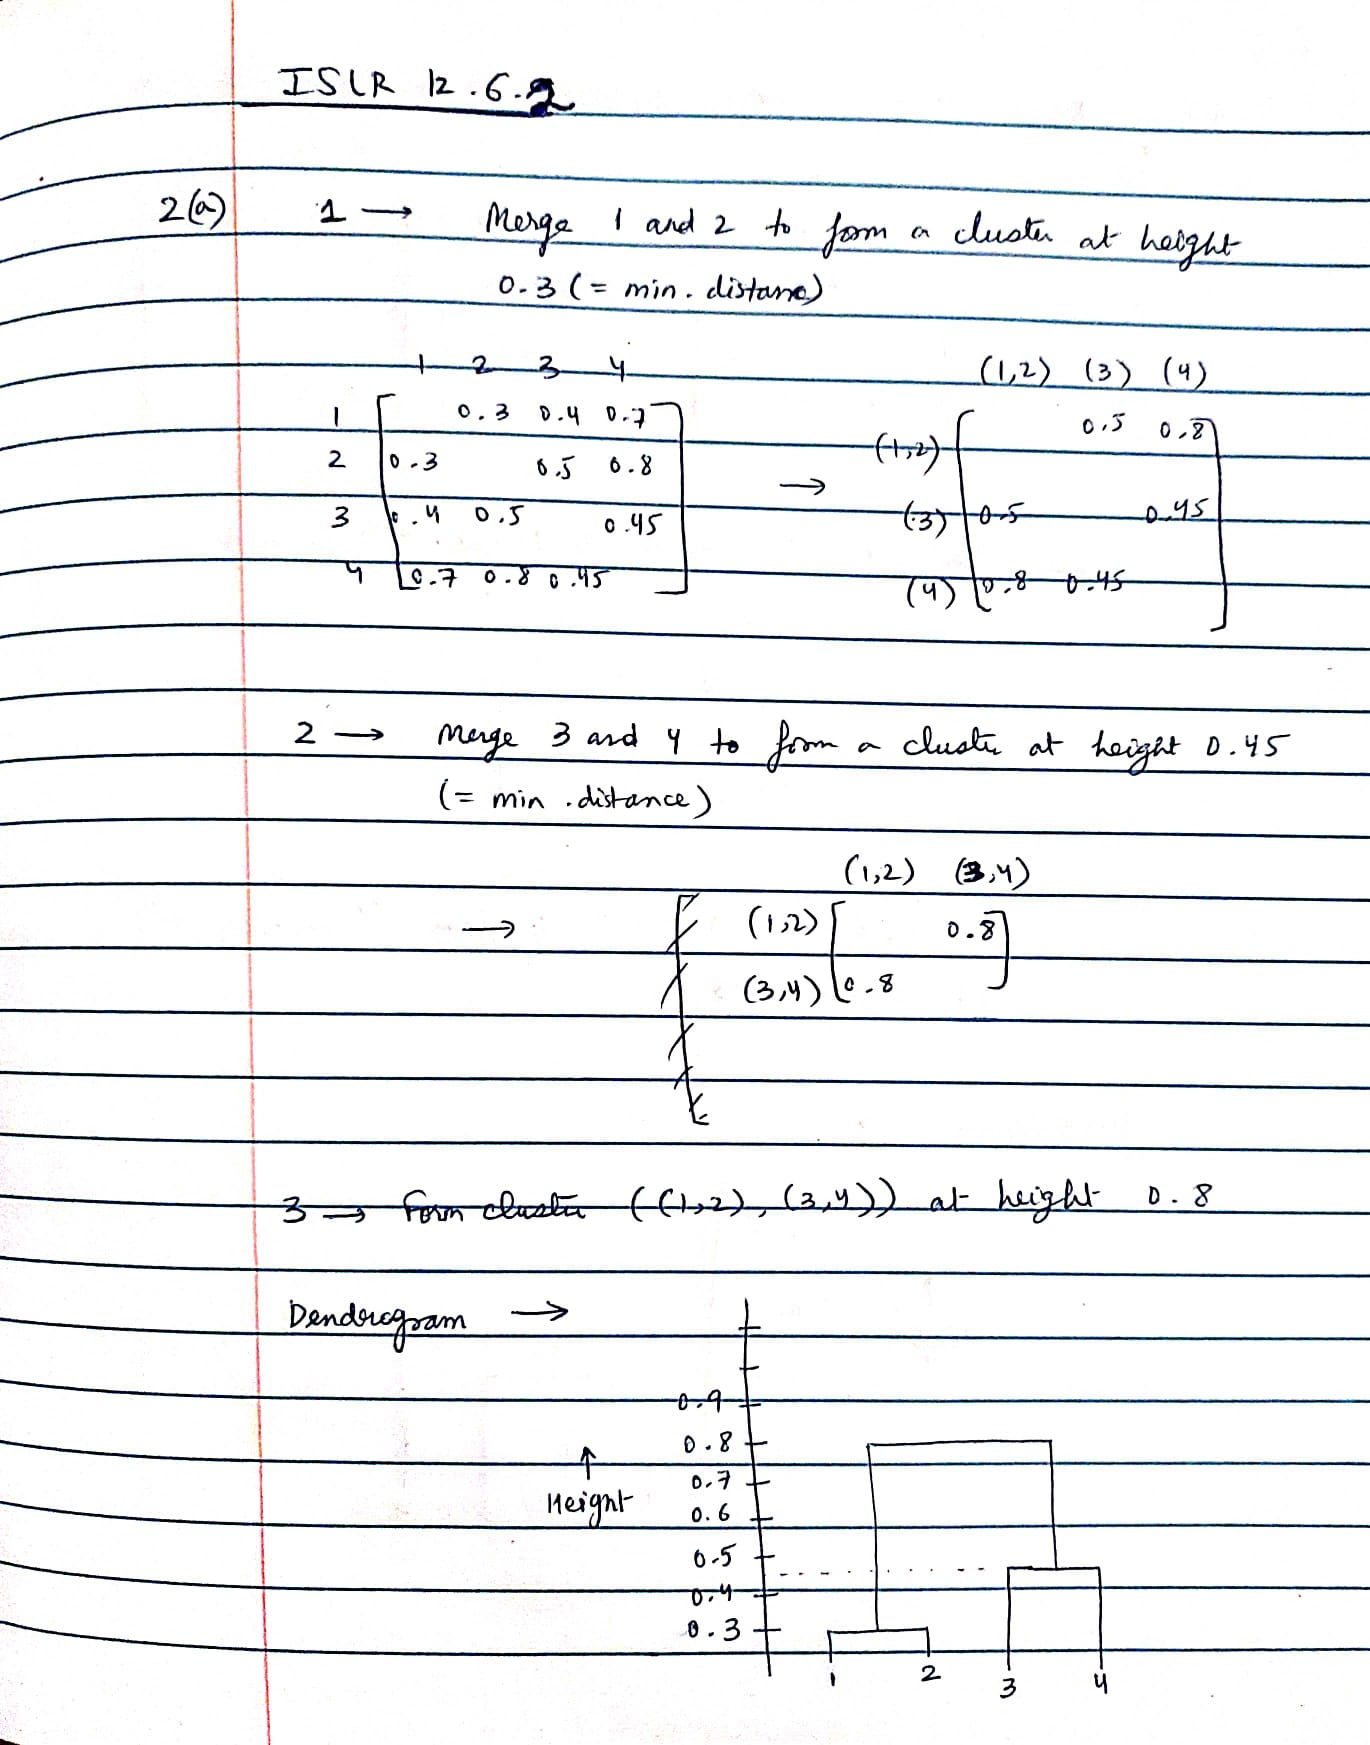

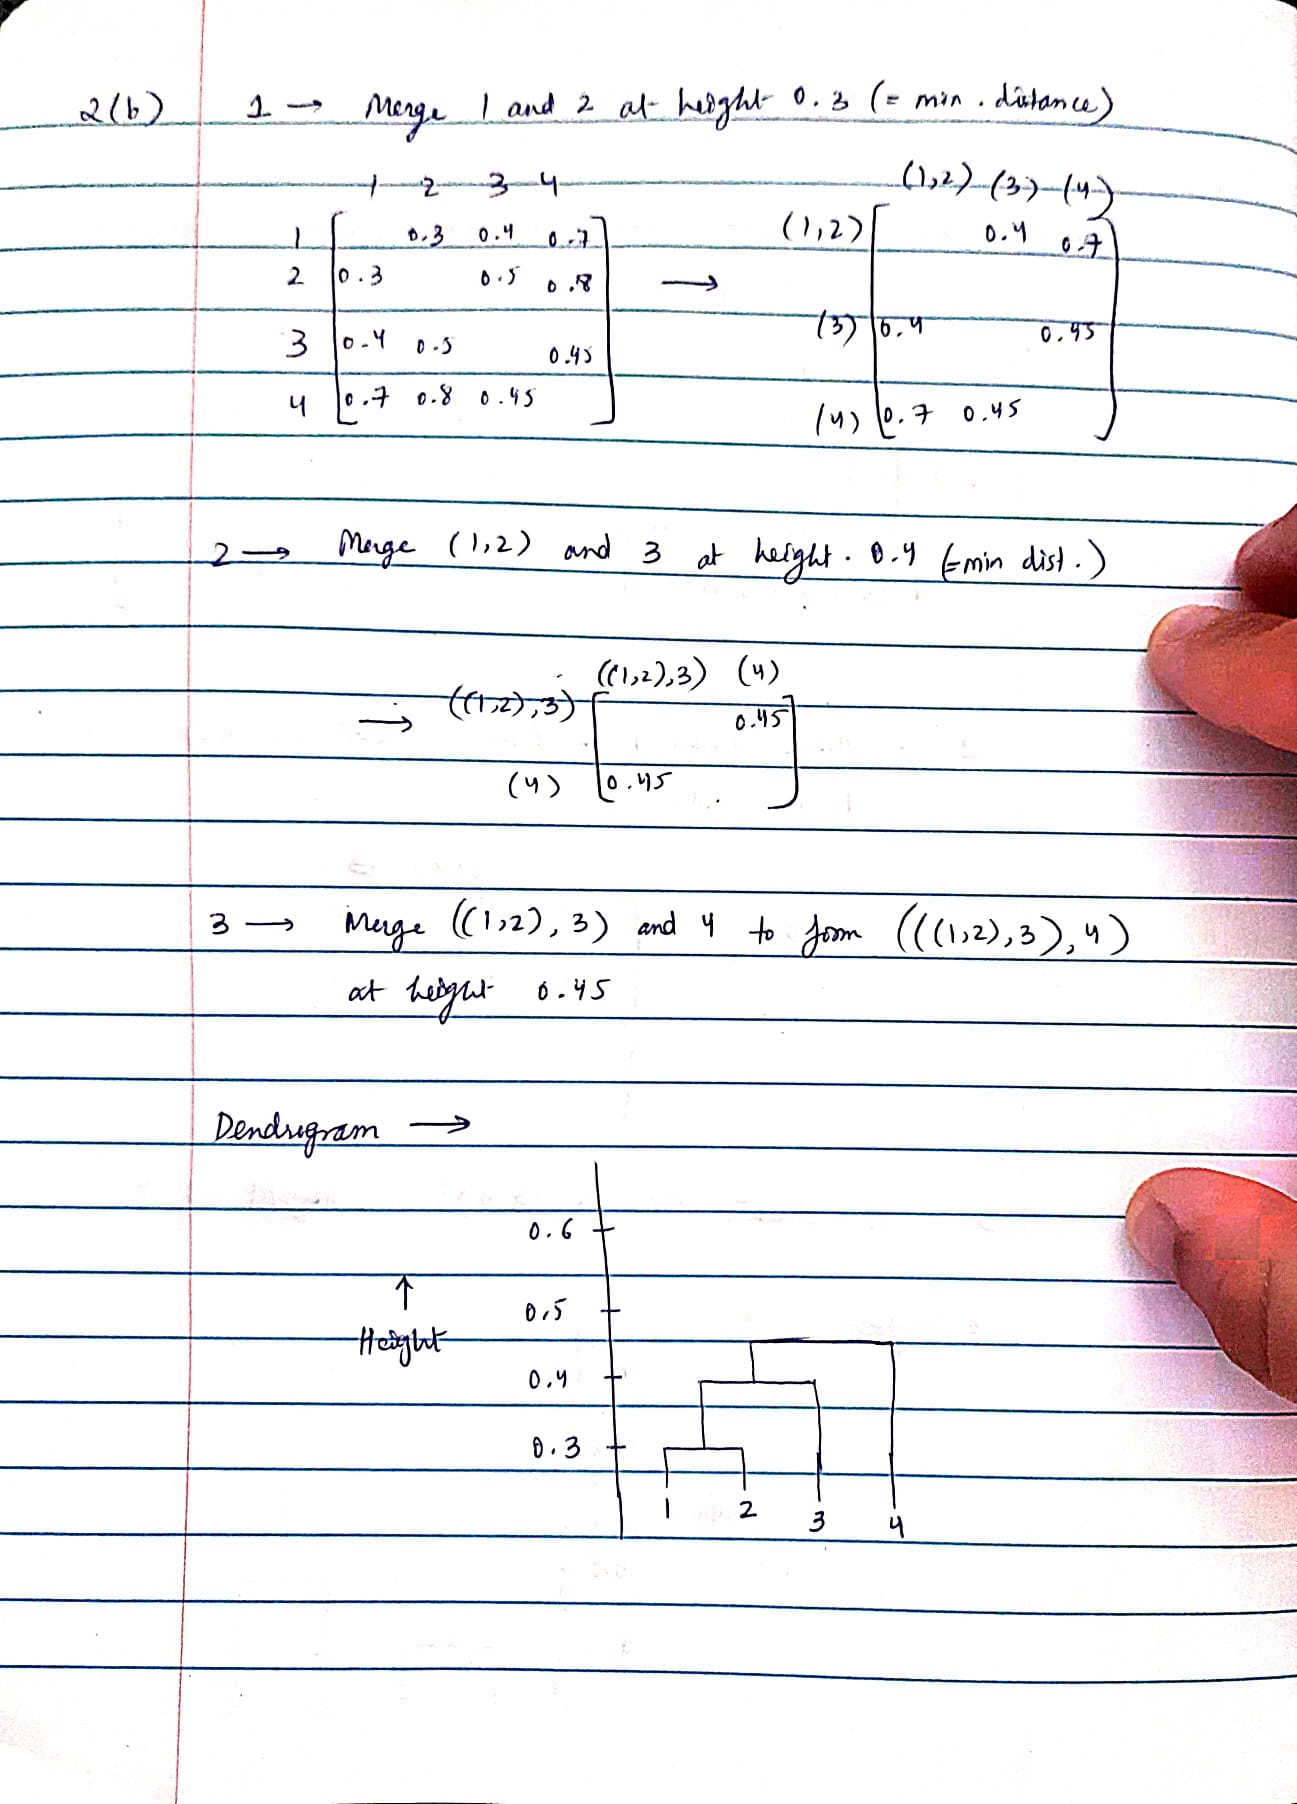

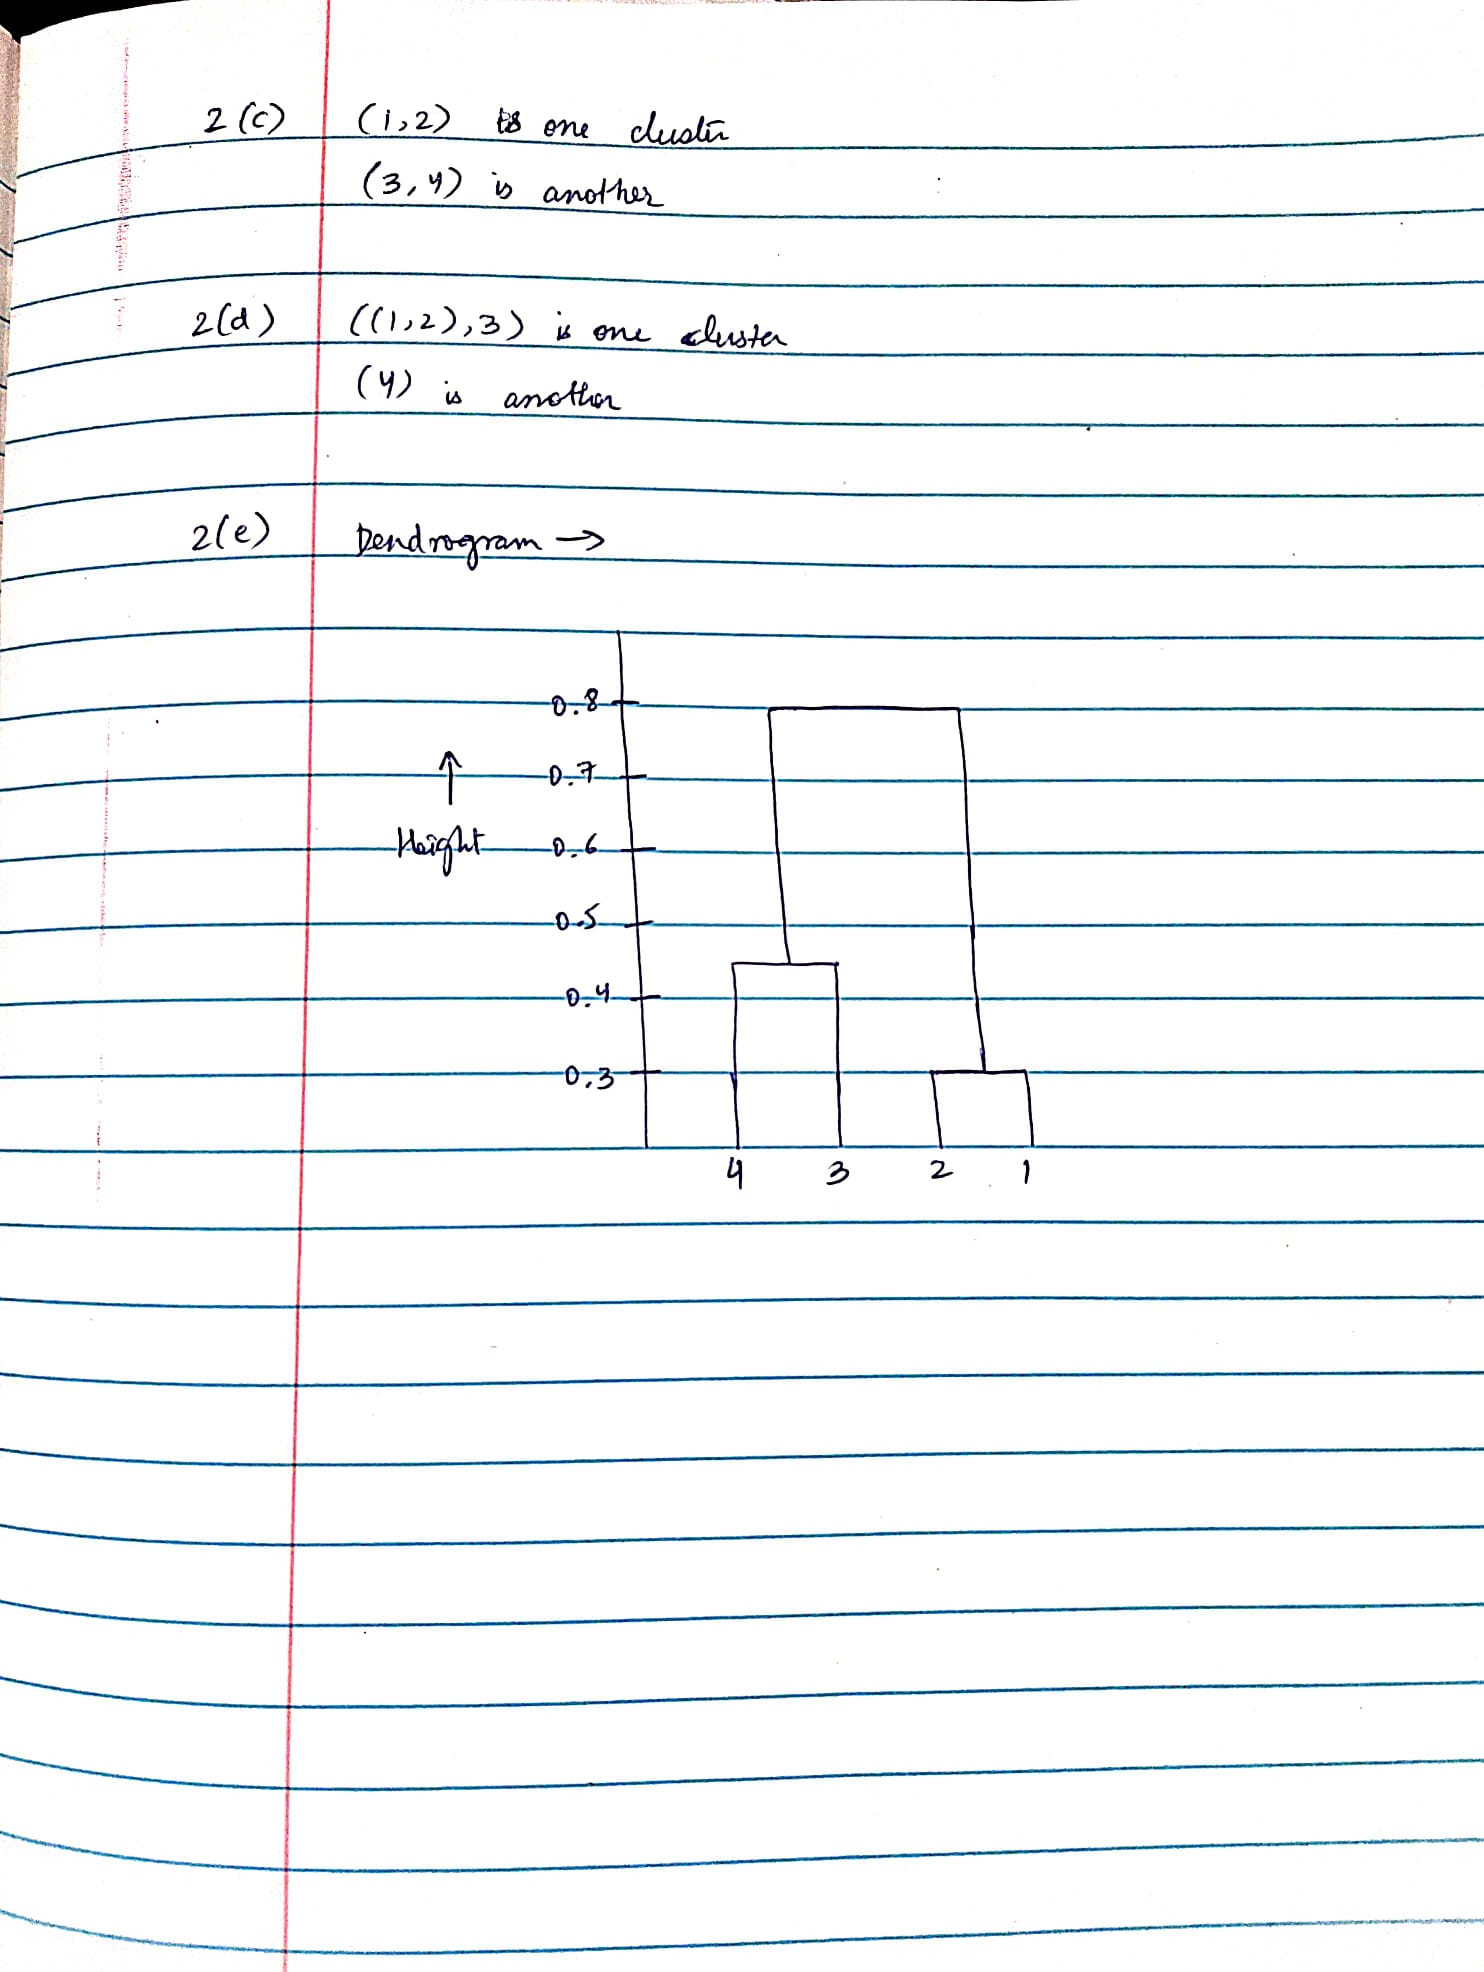

### Reference: 

#### https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a
#### https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c#:~:text=Silhouette%20Coefficient%20or%20silhouette%20score%20is%20a%20metric%20used%20to,each%20other%20and%20clearly%20distinguished.&text=a%3D%20average%20intra%2Dcluster%20distance,each%20point%20within%20a%20cluster